Elastic Regression

In [5]:
#Importing the necessary packages

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, ElasticNetCV

%matplotlib inline

In [6]:
def fcnCreateDataset(intSamples, intFeatures, intNonZeroFeatures):
    indexList = np.random.permutation(intFeatures + 1)
    betaTrue = np.zeros(intFeatures + 1)
    betaTrue[indexList[0:intNonZeroFeatures]] = 5 * np.random.randn(intNonZeroFeatures)
    x = np.random.randn(intSamples, intFeatures)    
    return x, betaTrue    

In [7]:
def fcnAddBias(x):
    return np.hstack((np.ones(len(x))[:,np.newaxis],x))

In [8]:
def fcnClipFunctionForProximalGradient(intBeta, intAlpha):
    intClip = np.minimum(intBeta, intAlpha)
    intClip = np.maximum(intClip, -intAlpha)
    return intClip

def fcnProximalL1Norm(betaHat, intAlpha, blnPenalizeAll = True):
    Out = betaHat - fcnClipFunctionForProximalGradient(betaHat,intAlpha)
    if not blnPenalizeAll:
        Out[0] = betaHat[0]
    return Out

In [22]:
#Calculating the Weight using Gradient Descent

def fcnCostFunctionRegularisedMSE(x, y, b, lda1, lda2):
    m = len(x)
    j = (1/(2*m) * (np.sum((y - np.dot(x,b))**2) + lda1 * np.sum(np.abs(b)) + lda2 * np.dot(b.T,b)))
    return j

def fcnCalculateWeightUsingProximalGradient(x, y, intLambda1 = 10.0 , intLambda2 = 10.0, intLR = 0.0001, intMaxIterations = 1000):
    if len(x.shape) == 1:
        x = x[:,np.newaxis]
    if len(y.shape) == 1:
        y = y[:,np.newaxis]
    x = fcnAddBias(x)
    intNumberOfSamples = x.shape[0]
    beta = np.zeros(x.shape[1])
    beta = beta[:,np.newaxis]
    CostFunctionValue = np.zeros(intMaxIterations)
    for i in range(0, intMaxIterations):
        Gradient = (np.dot(x.T,np.dot(x, beta) - y) + intLambda2 * beta)        
        beta = fcnProximalL1Norm(beta - intLR * Gradient, intLR * intLambda1, False)
        CostFunctionValue[i] = fcnCostFunctionRegularisedMSE(x, y, beta, intLambda1, intLambda2)
    return beta, CostFunctionValue

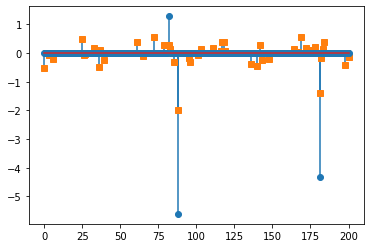

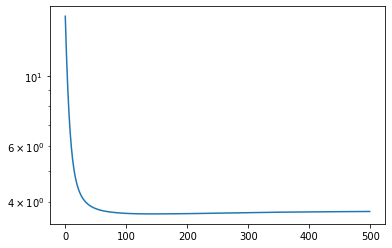

In [23]:
x,betaTrue = fcnCreateDataset(40, 200, 3)
noise = 0.001 * np.random.randn(40)
y = fcnAddBias(x) @ betaTrue + noise

beta, CostFunctionValue = fcnCalculateWeightUsingProximalGradient(x,y, 10, 10, 0.0005, 500)

plt.figure()
plt.stem(beta, markerfmt = 'C1s', use_line_collection = True)
plt.stem(betaTrue, use_line_collection = True)

plt.figure()
plt.semilogy(CostFunctionValue)

In [24]:
#Prediction and Error Metrics calculation

def fcnCalculateMSE(YActual, YPredicted):
    sum_error = 0.0
    for i in range(len(YActual)):
        prediction_error = YActual[i] - YPredicted[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(YActual))
    return mean_error

def fcnPredict(x,weight):
    return np.dot(x,weight)

def fcnCalculateSSE(yActual, yPredicted):
    return np.sum((yActual - yPredicted) ** 2)

def fcnCalculateSST(yActual, yPredicted):
    return np.sum((yPredicted - np.mean(yActual)) ** 2)

def fcnCalculateR(yActual, yPredicted):
    return 1 - (fcnCalculateSSE(yActual, yPredicted)/fcnCalculateSST(yActual, yPredicted))
    

In [25]:
data = pd.read_csv("mpg_data.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,category,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,low,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,Medium,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,low,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,low,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,low,ford galaxie 500


In [26]:
#Extracting the numerical features from pd to np

col = data.columns
we = data.to_numpy()
we = we[:,0:8]
we = we.astype(np.float64)
we

array([[ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       [ 16. ,   8. , 304. , ...,  12. ,  70. ,   1. ],
       ...,
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ],
       [ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ]])

In [27]:
#Splitting the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = we[:,1:]
y = we[:,0]
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
#Analysing the parameters using different methods

[[22.75330562]
 [-0.15223049]
 [-0.22539515]
 [-1.09535349]
 [-3.82695381]
 [-0.07745766]
 [ 2.48278231]
 [ 0.99205803]]


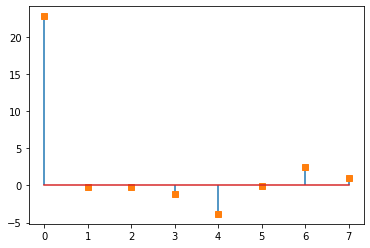

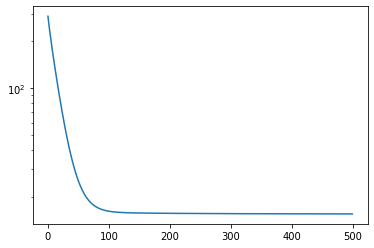

In [40]:
weight, CostValue = fcnCalculateWeightUsingProximalGradient(x_train, y_train, 10, 10, 0.0001, 500)

print(weight)

plt.figure()
plt.stem(weight, markerfmt = 'C1s', use_line_collection = True)

plt.figure()
plt.semilogy(CostValue)

The weight vector : [-0.25788805  1.66928484 -0.6362037  -5.87158084  0.24928929  2.65981575
  1.04533875] and intercept is : 23.466253533862425


<StemContainer object of 3 artists>

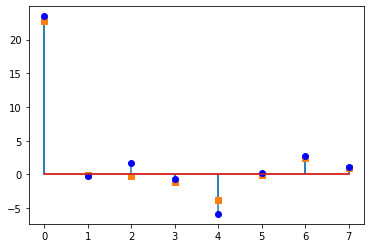

In [41]:
elastic_net_model = ElasticNet(alpha = 0.0001)
elastic_net_model.fit(x_train, y_train)

print("The weight vector : {} and intercept is : {}".format(elastic_net_model.coef_, elastic_net_model.intercept_))

w = elastic_net_model.coef_
w = np.insert(w, 0, elastic_net_model.intercept_, axis = 0)
w = w[:, np.newaxis]

plt.figure()
plt.stem(weight, markerfmt = 'C1s', use_line_collection = True)
plt.stem(w, markerfmt = 'bo', use_line_collection = True)

In [42]:
#Executing the model and calculating the error

yPredicted = fcnPredict(fcnAddBias(x_train),weight)
yPredicted_test = fcnPredict(fcnAddBias(x_test), weight)
SSE = fcnCalculateSSE(y_test[:,np.newaxis], yPredicted_test)
SST = fcnCalculateSST(y_test[:,np.newaxis], yPredicted_test)
R2 = fcnCalculateR(y_test[:,np.newaxis], yPredicted_test)

In [43]:
print("Train Error: {}".format(fcnCalculateMSE(y_train, yPredicted)))
print("Test Error: {}".format(fcnCalculateMSE(y_test, yPredicted_test)))
print("SSE: {}, SST: {}, R2: {}".format(SSE, SST, R2))

Train Error: [12.70744413]
Test Error: [7.87253693]
SSE: 621.9304177462822, SST: 3738.200997836261, R2: 0.8336284169561062


In [44]:
#Executing the model and calculating the error

yPredicted3 = fcnPredict(fcnAddBias(x_train),w)
yPredicted_test3 = fcnPredict(fcnAddBias(x_test), w)
SSE = fcnCalculateSSE(y_test[:,np.newaxis], yPredicted_test3)
SST = fcnCalculateSST(y_test[:,np.newaxis], yPredicted_test3)
R2 = fcnCalculateR(y_test[:,np.newaxis], yPredicted_test3)

print("Train Error: {}".format(fcnCalculateMSE(y_train, yPredicted3)))
print("Test Error: {}".format(fcnCalculateMSE(y_test, yPredicted_test3)))
print("SSE: {}, SST: {}, R2: {}".format(SSE, SST, R2))

Train Error: [11.76285294]
Test Error: [7.57663641]
SSE: 598.5542762215653, SST: 3873.344275853588, R2: 0.8454683514829936


In [47]:
alphas = 10**np.linspace(10,-2,100)*0.5
elastic_net_modelcv = ElasticNetCV(alphas = alphas, normalize = True)
elastic_net_model.fit(x_train, y_train)
elastic_net_model.alpha

0.0001

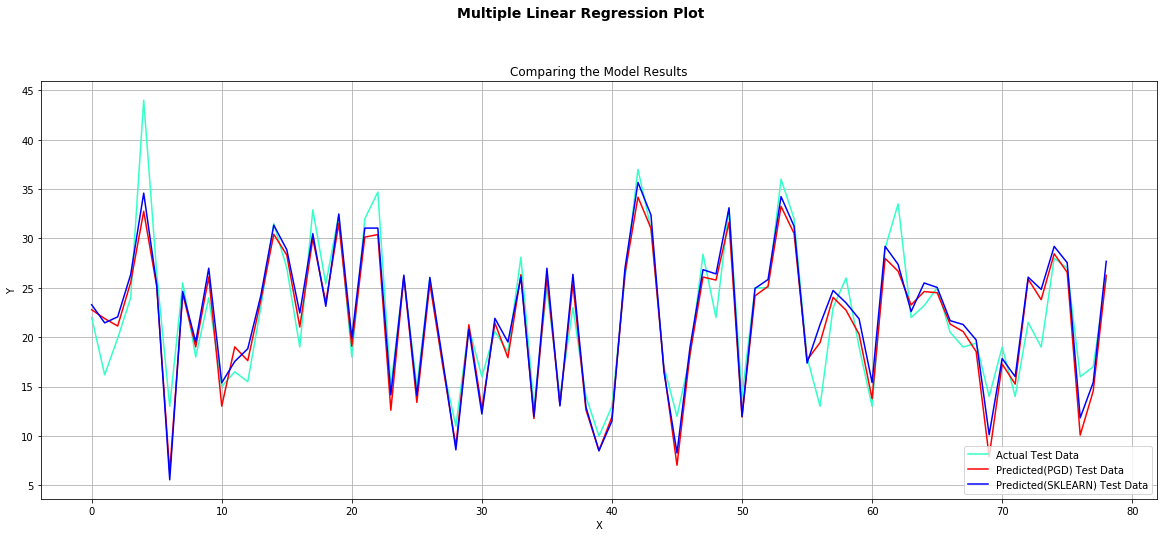

In [48]:
#Plotting all the datapoints

fig = plt.figure(figsize=(20,8))
fig.suptitle("Multiple Linear Regression Plot", fontsize=14, fontweight="bold")
ax = fig.add_subplot(111)
fig.subplots_adjust(top = 0.85)
ax.set_title("Comparing the Model Results")
ax.set_xlabel("X")
ax.set_ylabel("Y")
#ax.text(0, 500, "SSE : {} \nSST : {} \nR2   : {}".format(np.round(SSE,4),np.round( SST,4), np.round(R2,4)) , style = 'italic', bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.grid(True)
plt.plot(y_test , color='#33FFC7',label = 'Actual Test Data')
plt.plot(yPredicted_test, color='r', label = "Predicted(PGD) Test Data")
plt.plot(yPredicted_test3, color='b', label = "Predicted(SKLEARN) Test Data")
#plt.scatter(x_test, yPredicted_test, color='r', label = "Predicted Test Data")
#plt.scatter(xNew, yNew, color='b', label = "New Predicted Data")
#plt.plot(x_train, yPredicted, color = 'k', linewidth = 2, markersize = 12 , label = 'Regression Line using OLD')
#plt.plot(x_train, yPredicted2, color = 'r', linewidth = 2, markersize = 12 , label = 'Regression Line using Gradient Descent')
plt.legend(loc=4)
plt.show()